In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import pickle

In [2]:
# loading the diabetes dataset to a pandas DataFrame
data = pd.read_csv(r"/content/New_DataSet.csv")

In [3]:
# printing the first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
# number of rows and Columns in this dataset
data.shape

(10000, 9)

In [5]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


In [6]:
# 0--> Non - Diabetic
# 1--> Diabetic
data['Outcome'].value_counts()

,count
Outcome,
0,6656
1,3344


Undersampling is a technique used to balance the class distribution in a dataset
when there is an imbalance between the classes.
This involves reducing the number of instances in the majority class
to match the number of instances in the minority class.
This can help improve the performance of machine learning models by
ensuring they do not become biased towards the majority class.

In [7]:
df_class_0 = data[data["Outcome"]==0]
df_class_1 = data[data["Outcome"]==1]

print("After undersampling", len(df_class_0), len(df_class_1))

df_class_0 = df_class_0.sample(len(df_class_1))

print("After undersampling" , len(df_class_0), len(df_class_1))

data = pd.concat([df_class_0, df_class_1])

After undersampling 6656 3344
After undersampling 3344 3344


In [8]:
data['Outcome'].value_counts()

,count
Outcome,
0,3344
1,3344


In [9]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.300837,105.078050,70.341806,27.704246,116.294258,30.254921,0.355681,26.973983
1,5.202452,113.650419,73.262261,31.765849,185.464414,34.516537,0.493297,36.226077


In [10]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

Separating the data (features) and labels (target) is a common practice in machine learning for several reasons:

Model Training: Most machine learning models require input data (features) and corresponding labels (target) to learn the relationship between them. By separating them, we can easily feed them into the model.

Preprocessing: Data preprocessing steps (like scaling, encoding, etc.) are typically applied only to the features. Keeping features and labels separate makes it easier to apply these transformations.

Evaluation: When evaluating model performance, predictions are made on the features and compared against the true labels. Having them separate simplifies this process.

In [11]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
3352            1      143             48             27       41  20.199440   
3126            2       94             49             50      189  19.170572   
9830            1      148             86             45      152  20.011920   
4               1       85             59             27       35  42.604536   
94              1      133             83              7      665  21.516172   
...           ...      ...            ...            ...      ...        ...   
9982            1      108             61             43       91  30.601530   
9985            2      100             47             25      305  31.021941   
9991            4      140             94             25      170  32.448878   
9992            4      100             83             34       49  26.273109   
9997            5       99             59             47       67  30.774018   

      DiabetesPedigreeFunction  Age  
3

In [12]:
print(Y)

3352    0
3126    0
9830    0
4       0
94      0
       ..
9982    1
9985    1
9991    1
9992    1
9997    1
Name: Outcome, Length: 6688, dtype: int64


*Train* Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=42)

In [14]:
#feature scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature Extraction

In [15]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [9.16301474e-01 4.78759826e-02 1.28375310e-02 1.05155399e-02
 7.57230538e-03 4.35848478e-03 5.31086320e-04 7.59650876e-06]


Training and Evaluating Logistic Regression Model

Hyperparameter tuning for Logistic Regression using GridSearchCV

In [17]:
lr = LogisticRegression(max_iter=1000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [18]:
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_lr.fit(X_train_pca, Y_train)

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [19]:
print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Best Cross-Validation Accuracy for Logistic Regression: {best_score_lr}")

Best Parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.7648598130841121


In [20]:
best_lr = LogisticRegression(**best_params_lr, max_iter=1000)
best_lr.fit(X_train_pca, Y_train)

LogisticRegression(C=100, max_iter=1000)

In [21]:
lr_predictions = best_lr.predict(X_test_pca)
print("Logistic Regression Predictions:", lr_predictions)

Logistic Regression Predictions: [0 1 0 ... 1 0 0]


In [22]:
lr_accuracy = accuracy_score(lr_predictions, Y_test)
print(f"Logistic Regression Test Accuracy with Best Parameters: {lr_accuracy}")

Logistic Regression Test Accuracy with Best Parameters: 0.7608370702541106


Confusion Matrix for Logistic Regression

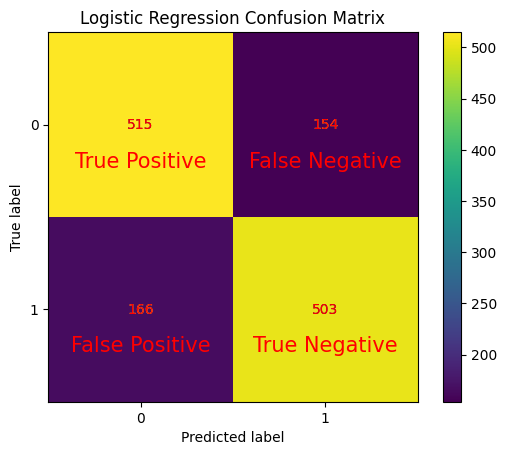

In [23]:
names = ["True Positive", "False Negative", "False Positive", "True Negative"]
lr_cm = confusion_matrix(Y_test, lr_predictions)
disp = ConfusionMatrixDisplay(lr_cm)
disp.plot()
for i in range(lr_cm.shape[0]):
    for j in range(lr_cm.shape[1]):
        cell_value = lr_cm[i, j]
        plt.text(j, i + 0.2, names[i*lr_cm.shape[1] + j], ha='center', va='center', color='Red', fontsize=15)
        plt.text(j, i, cell_value, ha='center', va='center', color='Red', fontsize=10)

plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [24]:
# Calculating Precision, Recall_Score, F1_Score
lr_precision = precision_score(Y_test, lr_predictions)
lr_recall = recall_score(Y_test, lr_predictions)
lr_f1 = f1_score(Y_test, lr_predictions)

In [25]:
# Calculating Type 1 and Type 2 errors, and Specificity
lr_tn, lr_fp, lr_fn, lr_tp = lr_cm.ravel()
lr_type_1_error = lr_fp / (lr_fp + lr_tn)
lr_type_2_error = lr_fn / (lr_tp + lr_fn)
lr_specificity = lr_tn / (lr_tn + lr_fp)

In [26]:
print("Logistic Regression")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")
print(f"Type 1 Error (False Positive Rate): {lr_type_1_error}")
print(f"Type 2 Error (False Negative Rate): {lr_type_2_error}")
print(f"Specificity: {lr_specificity}")

Logistic Regression
Precision: 0.7656012176560122
Recall: 0.7518684603886397
F1 Score: 0.7586726998491704
Type 1 Error (False Positive Rate): 0.23019431988041852
Type 2 Error (False Negative Rate): 0.24813153961136025
Specificity: 0.7698056801195815


Training and Evaluating SVM Model

Hyperparameter tuning for SVM using RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV


In [28]:
svm = SVC()
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [29]:
randomized_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')
randomized_search_svm.fit(X_train_pca, Y_train)

best_params_svm = randomized_search_svm.best_params_
best_score_svm = randomized_search_svm.best_score_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [30]:
print(f"Best Parameters for SVM: {best_params_svm}")
print(f"Best Cross-Validation Accuracy for SVM: {best_score_svm}")

Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best Cross-Validation Accuracy for SVM: 0.7986915887850468


In [31]:
best_svm = SVC(**best_params_svm)
best_svm.fit(X_train_pca, Y_train)

SVC(C=10)

In [32]:
svm_predictions = best_svm.predict(X_test_pca)
print("SVM Predictions:", svm_predictions)

SVM Predictions: [0 1 0 ... 1 0 1]


In [33]:
svm_accuracy = accuracy_score(svm_predictions, Y_test)
print(f"SVM Test Accuracy with Best Parameters: {svm_accuracy}")

SVM Test Accuracy with Best Parameters: 0.8139013452914798


Confusion Matrix for SVM Model

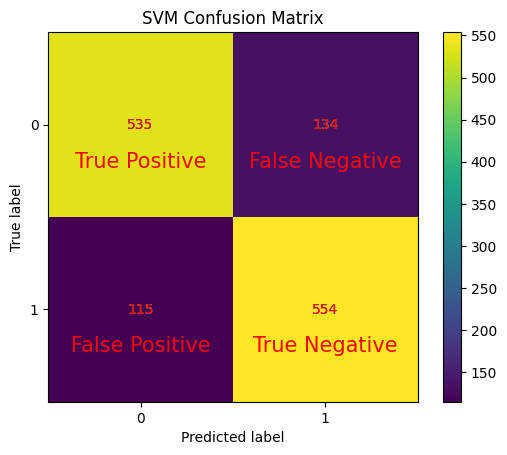

In [34]:
names = ["True Positive", "False Negative", "False Positive", "True Negative"]
svm_cm = confusion_matrix(Y_test, svm_predictions)
disp = ConfusionMatrixDisplay(svm_cm)
disp.plot()
for i in range(svm_cm.shape[0]):
    for j in range(svm_cm.shape[1]):
        cell_value = svm_cm[i, j]
        plt.text(j, i + 0.2, names[i*svm_cm.shape[1] + j], ha='center', va='center', color='Red', fontsize=15)
        plt.text(j, i, cell_value, ha='center', va='center', color='Red', fontsize=10)

plt.title("SVM Confusion Matrix")
plt.show()

In [35]:
# Calculating Precision, Recall_Score, F1_Score
svm_precision = precision_score(Y_test, svm_predictions)
svm_recall = recall_score(Y_test, svm_predictions)
svm_f1 = f1_score(Y_test, svm_predictions)

In [36]:
# Calculating Type 1 and Type 2 errors, and Specificity
svm_tn, svm_fp, svm_fn, svm_tp = svm_cm.ravel()
svm_type_1_error = svm_fp / (svm_fp + svm_tn)
svm_type_2_error = svm_fn / (svm_tp + svm_fn)
svm_specificity = svm_tn / (svm_tn + svm_fp)

In [37]:
print("SVM Model")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Type 1 Error (False Positive Rate): {svm_type_1_error}")
print(f"Type 2 Error (False Negative Rate): {svm_type_2_error}")
print(f"Specificity: {svm_specificity}")

SVM Model
Precision: 0.8052325581395349
Recall: 0.828101644245142
F1 Score: 0.8165070007369197
Type 1 Error (False Positive Rate): 0.20029895366218237
Type 2 Error (False Negative Rate): 0.17189835575485798
Specificity: 0.7997010463378177


Training and Evaluating Random Forest Model

Hyperparameter tuning for Random Forest using GridSearchCV

In [38]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

In [39]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train_pca, Y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

Fitting 2 folds for each of 150 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [40]:
print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Accuracy for Random Forest: {best_score_rf}")

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 400}
Best Cross-Validation Accuracy for Random Forest: 0.9140186915887851


In [41]:
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train_pca, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=400, random_state=42)

In [42]:
rf_predictions = best_rf.predict(X_test_pca)
print("Random Forest Predictions:", rf_predictions)

Random Forest Predictions: [0 1 0 ... 1 0 0]


In [43]:
rf_accuracy = accuracy_score(rf_predictions, Y_test)
print(f"Random Forest Test Accuracy with Best Parameters: {rf_accuracy}")

Random Forest Test Accuracy with Best Parameters: 0.9162929745889388


Confusion Matrix for Random Forest

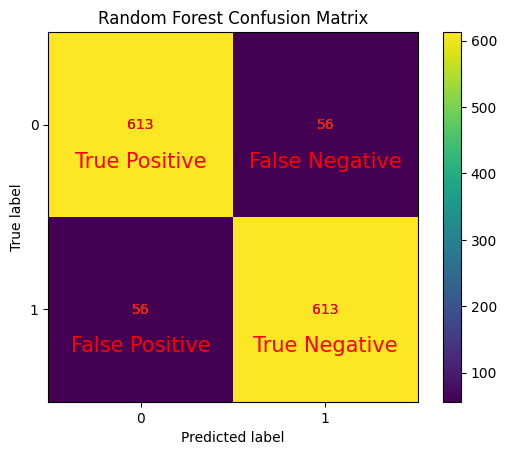

In [44]:
names = ["True Positive", "False Negative", "False Positive", "True Negative"]
rf_cm = confusion_matrix(Y_test, rf_predictions)
disp = ConfusionMatrixDisplay(rf_cm)
disp.plot()
for i in range(rf_cm.shape[0]):
    for j in range(rf_cm.shape[1]):
        cell_value = rf_cm[i, j]
        plt.text(j, i + 0.2, names[i*rf_cm.shape[1] + j], ha='center', va='center', color='Red', fontsize=15)
        plt.text(j, i, cell_value, ha='center', va='center', color='Red', fontsize=10)

plt.title("Random Forest Confusion Matrix")
plt.show()

In [45]:
# Calculating Precision, Recall_Score, F1_Score
rf_precision = precision_score(Y_test, rf_predictions)
rf_recall = recall_score(Y_test, rf_predictions)
rf_f1 = f1_score(Y_test, rf_predictions)

In [46]:
# Calculating Type 1 and Type 2 errors, and Specificity
rf_tn, rf_fp, rf_fn, rf_tp = rf_cm.ravel()
rf_type_1_error = rf_fp / (rf_fp + rf_tn)
rf_type_2_error = rf_fn / (rf_tp + rf_fn)
rf_specificity = rf_tn / (rf_tn + rf_fp)

In [47]:
print("Random Forest")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Type 1 Error (False Positive Rate): {rf_type_1_error}")
print(f"Type 2 Error (False Negative Rate): {rf_type_2_error}")
print(f"Specificity: {rf_specificity}")

Random Forest
Precision: 0.9162929745889388
Recall: 0.9162929745889388
F1 Score: 0.9162929745889388
Type 1 Error (False Positive Rate): 0.08370702541106129
Type 2 Error (False Negative Rate): 0.08370702541106129
Specificity: 0.9162929745889388


Comparing Model Performances

Accuracy

In [48]:
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

Logistic Regression Accuracy: 0.7608370702541106
SVM Accuracy: 0.8139013452914798
Random Forest Accuracy: 0.9162929745889388


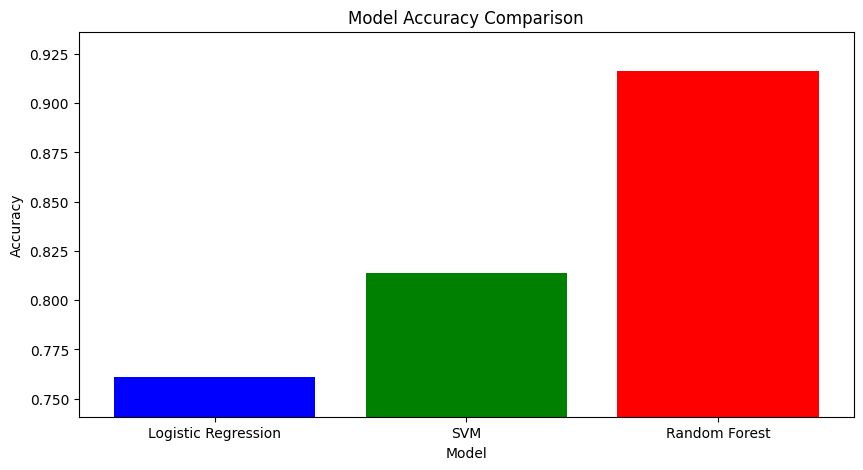

In [49]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Determine the min and max accuracy
min_accuracy = min(accuracies)
max_accuracy = max(accuracies)

# Set y-axis limits to focus on the range of accuracies
plt.ylim(min_accuracy - 0.02, max_accuracy + 0.02)

plt.show()

Precision

In [50]:
print(f"Precision: {lr_precision}")
print(f"Precision: {svm_precision}")
print(f"Precision: {rf_precision}")

Precision: 0.7656012176560122
Precision: 0.8052325581395349
Precision: 0.9162929745889388


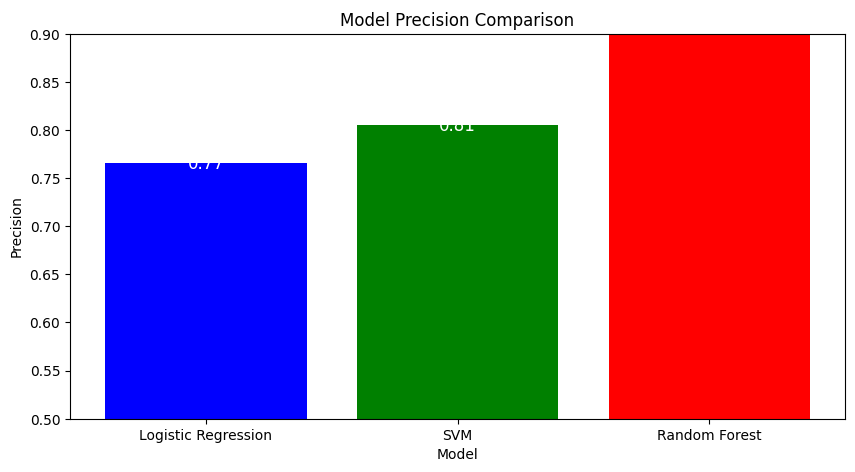

In [51]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
precisions = [lr_precision, svm_precision, rf_precision]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, precisions, color=['blue', 'green', 'red'])

# Add text labels on top of the bars
for bar, precision in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01,
             f'{precision:.2f}', ha='center', va='bottom', color='white', fontsize=12)

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.ylim(0.5, 0.9)  # Adjusting y-axis limits for better visualization
plt.show()

Recall

In [52]:
print(f"Recall: {lr_recall}")
print(f"Recall: {svm_recall}")
print(f"Recall: {rf_recall}")

Recall: 0.7518684603886397
Recall: 0.828101644245142
Recall: 0.9162929745889388


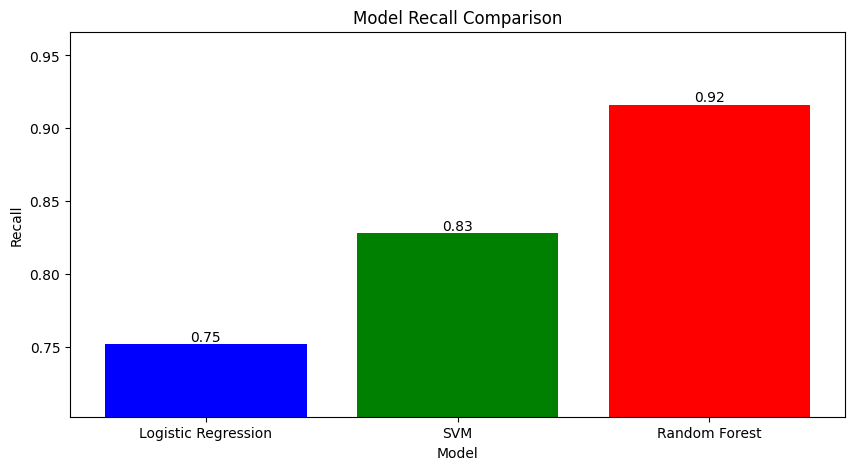

In [53]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
recalls = [lr_recall, svm_recall, rf_recall]

# Calculate the range of recall values
min_recall = min(recalls)
max_recall = max(recalls)

# Set the y-axis limits to focus on the range of recall values
y_min = max(0, min_recall - 0.05)
y_max = min(1, max_recall + 0.05)

plt.figure(figsize=(10, 5))
bars = plt.bar(models, recalls, color=['blue', 'green', 'red'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.ylim(y_min, y_max)
plt.show()

F1 Score

In [54]:
print(f"F1 Score: {lr_f1}")
print(f"F1 Score: {svm_f1}")
print(f"F1 Score: {rf_f1}")

F1 Score: 0.7586726998491704
F1 Score: 0.8165070007369197
F1 Score: 0.9162929745889388


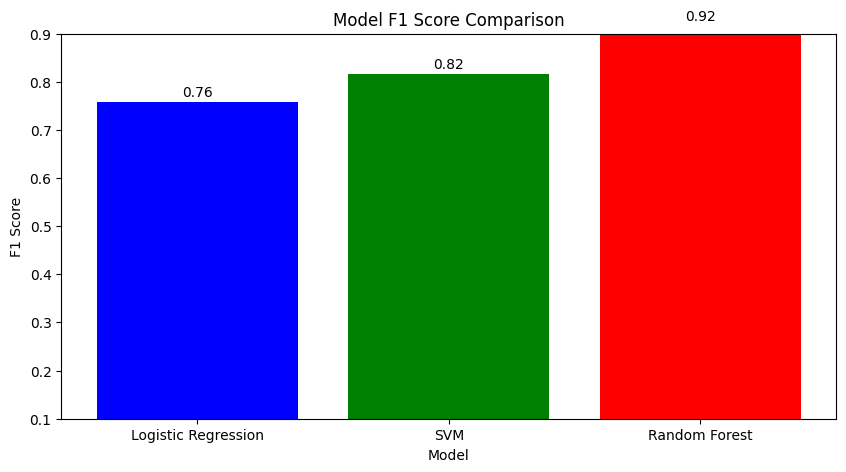

In [55]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
f1scores = [lr_f1, svm_f1, rf_f1]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, f1scores, color=['blue', 'green', 'red'])

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.ylim(0.1, 0.9)  # Adjusted y-axis limits

# Add text labels on top of the bars
for bar, f1score in zip(bars, f1scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.005, round(f1score, 2), ha='center', va='bottom')

plt.show()

Type 1 Error and Type 2 Error

In [56]:
print(f"Type 1 Error (False Positive Rate): {lr_type_1_error}")
print(f"Type 2 Error (False Negative Rate): {lr_type_2_error}")
print(f"Type 1 Error (False Positive Rate): {svm_type_1_error}")
print(f"Type 2 Error (False Negative Rate): {svm_type_2_error}")
print(f"Type 1 Error (False Positive Rate): {rf_type_1_error}")
print(f"Type 2 Error (False Negative Rate): {rf_type_2_error}")

Type 1 Error (False Positive Rate): 0.23019431988041852
Type 2 Error (False Negative Rate): 0.24813153961136025
Type 1 Error (False Positive Rate): 0.20029895366218237
Type 2 Error (False Negative Rate): 0.17189835575485798
Type 1 Error (False Positive Rate): 0.08370702541106129
Type 2 Error (False Negative Rate): 0.08370702541106129


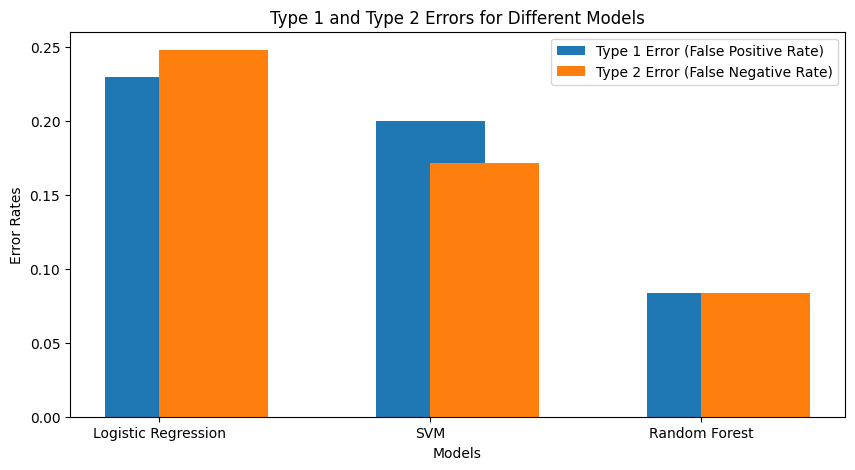

In [57]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
type_1_errors = [lr_type_1_error, svm_type_1_error, rf_type_1_error]
type_2_errors = [lr_type_2_error, svm_type_2_error, rf_type_2_error]

x = range(len(models))

plt.figure(figsize=(10, 5))

plt.bar(x, type_1_errors, width=0.4, label='Type 1 Error (False Positive Rate)', align='center')
plt.bar(x, type_2_errors, width=0.4, label='Type 2 Error (False Negative Rate)', align='edge')

plt.xlabel('Models')
plt.ylabel('Error Rates')
plt.title('Type 1 and Type 2 Errors for Different Models')
plt.xticks(x, models)
plt.legend()

plt.show()

Specificity

In [58]:
print(f"Specificity: {lr_specificity}")
print(f"Specificity: {svm_specificity}")
print(f"Specificity: {rf_specificity}")

Specificity: 0.7698056801195815
Specificity: 0.7997010463378177
Specificity: 0.9162929745889388


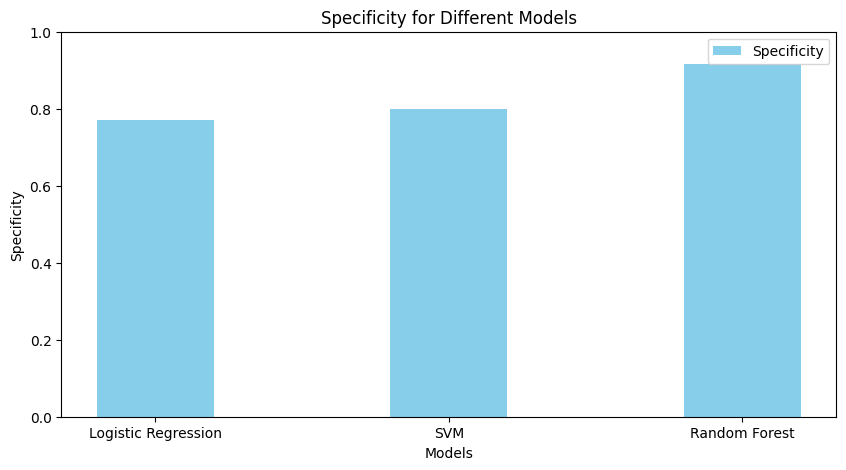

In [59]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
specificities = [lr_specificity, svm_specificity, rf_specificity]

x = range(len(models))

plt.figure(figsize=(10, 5))

plt.bar(x, specificities, width=0.4, label='Specificity', align='center', color='skyblue')

plt.xlabel('Models')
plt.ylabel('Specificity')
plt.title('Specificity for Different Models')
plt.xticks(x, models)
plt.ylim(0, 1)  # Setting y-axis limit to [0, 1] to represent specificity as a fraction
plt.legend()

plt.show()

Table

In [60]:
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

# Example confusion matrix values (replace with actual values)
conf_matrices = {
    "Logistic Regression": confusion_matrix(Y_test, lr_predictions),
    "SVM": confusion_matrix(Y_test, svm_predictions),
    "Random Forest": confusion_matrix(Y_test, rf_predictions),
}

# Flatten confusion matrix to display
def flatten_confusion_matrix(cm):
    return [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

# Calculate and flatten confusion matrices
conf_matrix_values = {
    model: flatten_confusion_matrix(cm) for model, cm in conf_matrices.items()
}

# Metrics dictionary (replace with actual values)
metrics = {
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [lr_accuracy, svm_accuracy, rf_accuracy],
    "Precision": [lr_precision, svm_precision, rf_precision],
    "Recall": [lr_recall, svm_recall, rf_recall],
    "F1 Score": [lr_f1, svm_f1, rf_f1],
    "Specificity": [lr_specificity, svm_specificity, rf_specificity]
}

# Create table data with confusion matrix values
table = [
    [
        metrics["Model"][i],
        round(metrics["Accuracy"][i], 2),
        round(metrics["Precision"][i], 2),
        round(metrics["Recall"][i], 2),
        round(metrics["F1 Score"][i], 2),
        round(metrics["Specificity"][i], 2),
        *conf_matrix_values[metrics["Model"][i]]
    ]
    for i in range(len(metrics["Model"]))
]

# Define the headers including confusion matrix components
headers = [
    "Model", "Accuracy", "Precision", "Recall", "F1 Score",
    "Specificity",
    "TP", "FN", "FP", "TN"
]

# Print the table with tabulate
print(tabulate(table, headers, tablefmt="grid"))


+---------------------+------------+-------------+----------+------------+---------------+------+------+------+------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   Specificity |   TP |   FN |   FP |   TN |
+=====================+============+=============+==========+============+===============+======+======+======+======+
| Logistic Regression |       0.76 |        0.77 |     0.75 |       0.76 |          0.77 |  515 |  154 |  166 |  503 |
+---------------------+------------+-------------+----------+------------+---------------+------+------+------+------+
| SVM                 |       0.81 |        0.81 |     0.83 |       0.82 |          0.8  |  535 |  134 |  115 |  554 |
+---------------------+------------+-------------+----------+------------+---------------+------+------+------+------+
| Random Forest       |       0.92 |        0.92 |     0.92 |       0.92 |          0.92 |  613 |   56 |   56 |  613 |
+---------------------+------------+------------

Making a Predictive System

In [61]:
import numpy as np

In [62]:
# input_data = (5,106,72,19,175,25.8,0.587,51)

input_data = (5,106,72,19,17,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =best_svm.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


Saving the trained model

In [63]:
import pickle

In [69]:
filename = '/content/diabetes_model (3).pkl'
pickle.dump(rf_model, open(filename, 'wb'))

NameError: name 'rf_model' is not defined

In [ ]:
# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# from google.colab import files

In [ ]:
# files.download(filename)

Testing

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
for column in X.columns:
  print(column)